**Исследование задержек для аэропортов Нью-Йорка (JFK, LGA, EWR)**

Всюду далее положительной задержкой будет называться положительная в математическом смысле задержка.    

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url1 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
url2 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')
flights = pd.read_csv(url1, sep=',')
weather =  pd.read_csv(url2, sep=',')
flights.head(3)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0


In [126]:
weather.head(3)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0


Для начала узнаем общее количество вылетов из аэропортов:

In [127]:
flights.origin.value_counts()

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

И среднюю задержку по каждому из них:

In [128]:
flights.groupby('origin').mean()['dep_delay']

origin
EWR    15.107954
JFK    12.112159
LGA    10.346876
Name: dep_delay, dtype: float64

Теперь посмотрим "настоящую" среднюю задержку, то есть среднюю задержку если она действительно была.

In [129]:
flights_delayed = flights[(flights.dep_delay > 0)]
flights_delayed.groupby('origin').mean()['dep_delay']

origin
EWR    38.987915
JFK    38.046775
LGA    41.630959
Name: dep_delay, dtype: float64

Видно, что они отличаются, так как случается и отрицательная задержка, то есть рейс вылетел раньше. Посмотрим теперь среднее ускорение если рейс все таки вылетел раньше

In [130]:
flights_early = flights[(flights.dep_delay < 0)]
flights_early.groupby('origin').mean()['dep_delay']

origin
EWR   -4.695734
JFK   -4.479116
LGA   -5.579781
Name: dep_delay, dtype: float64

Посмотрим теперь какой из аэропортов чаще всего задерживает рейс

In [131]:
flights_delayed.origin.value_counts()

EWR    52711
JFK    42031
LGA    33690
Name: origin, dtype: int64

Больше всего рейсов задержались в EWR 

Посмотрим как часто вообще происходят задержки для EWR и представим данные в виде диаграммы.

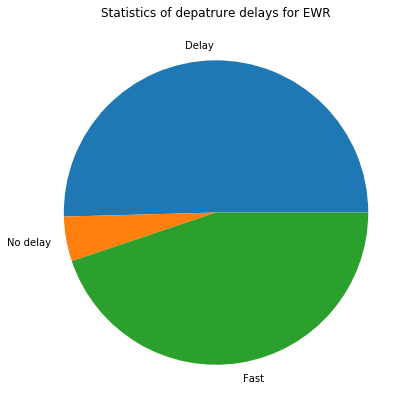

In [132]:
fl_del_ewr = flights[(flights.dep_delay < 0) & (flights.origin == 'EWR')]
fl_fast_ewr = flights[(flights.dep_delay > 0) & (flights.origin == 'EWR')]
fl_nodel_ewr = flights[(flights.dep_delay == 0) & (flights.origin == 'EWR')]
plt.figure(figsize=(7,7))
plt.pie([fl_del_ewr.origin.value_counts()[0],fl_nodel_ewr.origin.value_counts()[0],fl_fast_ewr.origin.value_counts()[0]], labels = ['Delay', 'No delay', 'Fast'])
plt.title('Statistics of depatrure delays for EWR')
plt.show()

Видно, что рейсы почти не вылетают вовремя, что достаточно странно. При этом рейсов с задержкой примерно половина.

Определим среднее время положительной задержки по авиакомпаниям:

Text(0, 0.5, 'Mean delay')

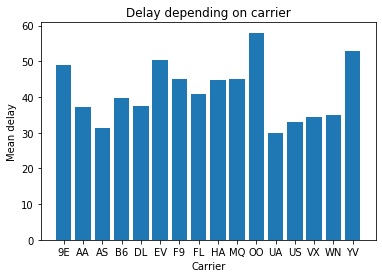

In [133]:
delays = flights_delayed.groupby('carrier').mean()['dep_delay']
plt.bar(range(len(delays)), delays)
plt.xticks(range(len(delays)), delays.index)
plt.title('Delay depending on carrier')
plt.xlabel('Carrier')
plt.ylabel('Mean delay')

Самая длинная средняя задержка у авиакомпании ОО 

Определим зависимость задержки от времени суток:

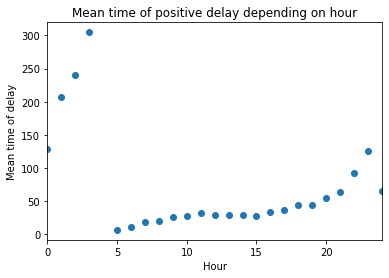

In [134]:
flights_gr = pd.DataFrame(flights_delayed.groupby(flights_delayed.hour)['dep_delay'].mean().reset_index(name='mean_delay'))
plt.scatter(flights_gr.hour, flights_gr.mean_delay)
plt.xlim(0, 24)
plt.ylabel('Mean time of delay')
plt.xlabel('Hour')
plt.title('Mean time of positive delay depending on hour')
plt.show()

Большая часть задержек происходит в ночное время

Определим зависимость средней положительной задержки от месяца: 

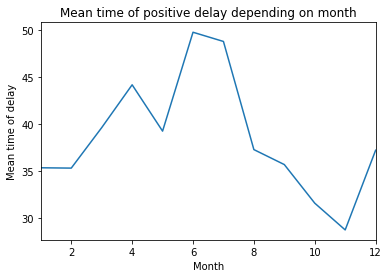

In [135]:
flights_gr = pd.DataFrame(flights_delayed.groupby(flights_delayed.month)['dep_delay'].mean().reset_index(name='mean_delay'))
plt.plot(flights_gr.month, flights_gr.mean_delay,'')
plt.xlim(1, 12)
plt.ylabel('Mean time of delay')
plt.xlabel('Month')
plt.title('Mean time of positive delay depending on month')
plt.show()

Видно, что худший месяц - июль, а лучший - ноябрь

Почему так получилось? Посмотрим загруженность аэропортов в зависимости от месяца.

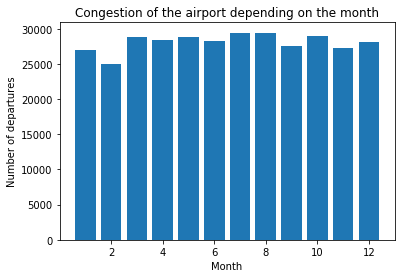

In [136]:
flights_gr = pd.DataFrame(flights.month.value_counts().reset_index(name = 'Number'))
plt.bar(np.array(flights_gr['index']), np.array(flights_gr.Number))
plt.xlabel('Month')
plt.ylabel('Number of departures')
plt.title('Congestion of the airport depending on the month')
plt.show()

Действительно, из графика видно, что июль - один из самых загруженных месяцев. Но в августе при почти такой же (на 97 вылетов меньше) загруженности средняя задержка в полтора раза меньше. Возможно, дело в отпусках сотрудников аэропорта в июле, но вопрос требует дальнейшего исследования.

Теперь перейдем к исследованию зависимостей от погоды. 

In [0]:
flights = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')

Влажность воздуха:

Text(0, 0.5, 'Mean delay')

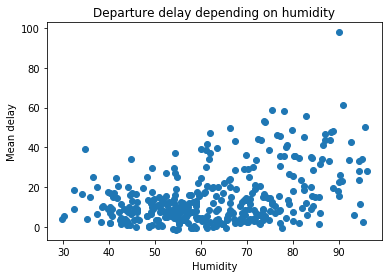

In [138]:
plt.scatter(flights.groupby(['month','day'])['humid'].mean(), flights.groupby(['month','day'])['dep_delay'].mean())
plt.title('Departure delay depending on humidity')
plt.xlabel('Humidity')
plt.ylabel('Mean delay')

Видно, что при большей влажности средняя задержка отправления выше.

Text(0, 0.5, 'Mean delay')

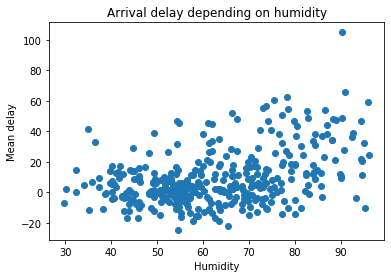

In [139]:
plt.scatter(flights.groupby(['month','day'])['humid'].mean(), flights.groupby(['month','day'])['arr_delay'].mean())
plt.title('Arrival delay depending on humidity')
plt.xlabel('Humidity')
plt.ylabel('Mean delay')

Для задержки прибытия зависимость тоже прослеживается, но не так явно.

Видимость:

Text(0, 0.5, 'Mean arrival delay')

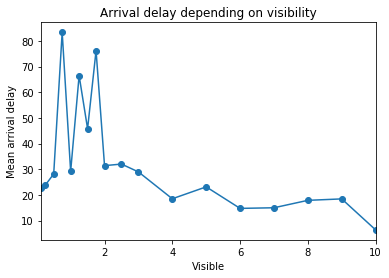

In [140]:
visib_delay = flights.groupby('visib').mean()['arr_delay']
plt.scatter(visib_delay.index, visib_delay)
visib_delay.plot()
plt.title('Arrival delay depending on visibility')
plt.xlabel('Visible')
plt.ylabel('Mean arrival delay')

Ожидаемо, самолеты прилетают позже при низкой видимости. 

Text(0, 0.5, 'Mean arrival delay')

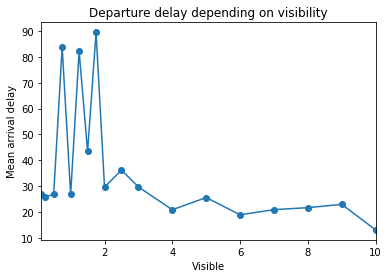

In [141]:
visib_delay = flights.groupby('visib').mean()['dep_delay']
plt.scatter(visib_delay.index, visib_delay)
visib_delay.plot()

plt.title('Departure delay depending on visibility')
plt.xlabel('Visible')
plt.ylabel('Mean arrival delay')

Для времени отправления ситуация аналогичная

И наконец, скорость ветра: 

Text(0, 0.5, 'Mean delay')

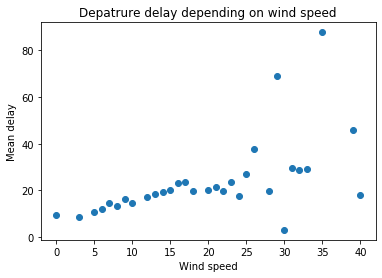

In [142]:
flights['wind_speed'] = flights.wind_speed.apply(lambda x: x if np.isnan(x) else round(x))
wind_delay = flights.groupby('wind_speed').mean()['dep_delay']
wind_delay = wind_delay.sort_index()
wind_delay = wind_delay.drop(labels=[wind_delay.index[-1]])
plt.scatter(wind_delay.index, wind_delay)
plt.title('Depatrure delay depending on wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Mean delay')

И вновь получили ожидаемый результат: самолеты тем больше задерживаются, чем больше скорость ветра. 

Text(0, 0.5, 'Mean delay')

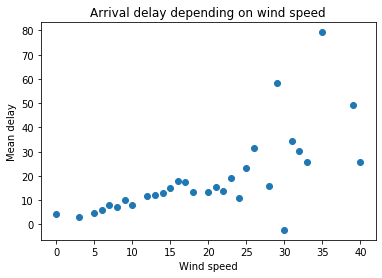

In [143]:
flights['wind_speed'] = flights.wind_speed.apply(lambda x: x if np.isnan(x) else round(x))
wind_delay = flights.groupby('wind_speed').mean()['arr_delay']
wind_delay = wind_delay.sort_index()
wind_delay = wind_delay.drop(labels=[wind_delay.index[-1]])
plt.scatter(wind_delay.index, wind_delay)
plt.title('Arrival delay depending on wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Mean delay')

С прибытием ситуация аналогичная.